<a href="https://colab.research.google.com/github/Adetayo047/MrsIyanu/blob/main/Time_Series_Forecasting_with_LSTM%2C_GRU%2C_and_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Mrs Iyanu ProjectN

/content/drive/MyDrive/Mrs Iyanu ProjectN


In [ ]:
ls

 4_5915858979661025765.xlsx   Ebonyi/                           Ondocomb.xlsx
 AllState1.xlsx               Ebonyicomb.xlsx                   Plateau/
 allstatebf.xlsx              Edo/                              Plateaucomb.xlsx
 AllState.xlsx                Edocomb.xlsx                      synthetic_data_gen.ipynb
 Bauchi/                      grouped_Bauchicomb.xlsx           Taraba/
 Bauchicomb.xlsx             'Lassa Fever Dataset Final.xlsx'   Tarabacomb.xlsx
 combined_data.csv            NewAlldata.xlsx
'Copy of phd work.ipynb'      Ondo/


In [ ]:
import pandas as pd
import numpy as np
import torch
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel('4_5915858979661025765.xlsx')

In [ ]:

data

,State,Year,Value,Tempeature,Precipitation,Relative Humudity,Value.1
0,Bauchi,2017,0.0,0.000000,14.234694,0.000000,0.0
1,Bauchi,2017,0.0,0.000000,11.860204,0.000000,0.0
2,Bauchi,2017,0.0,1.224490,40.217143,0.000000,0.0
3,Bauchi,2017,0.0,3.197959,56.391429,0.000000,0.0
4,Bauchi,2017,0.0,2.902041,62.717143,0.000000,0.0
...,...,...,...,...,...,...,...
940,Taraba,2020,0.0,5.931633,67.481633,296.136735,0.0
941,Taraba,2020,0.0,4.609388,74.286735,296.222449,0.0
942,Taraba,2020,0.0,3.167347,51.497959,297.467347,0.0
943,Taraba,2020,0.0,0.001224,21.964286,298.310204,0.0


In [ ]:
data.isna().sum()

State                  0
Year                   0
Value                185
Tempeature             0
Precipitation          0
Relative Humudity      0
Value.1              190
dtype: int64

In [ ]:
data.fillna(0, inplace=True)
data.isna().sum()

State                0
Year                 0
Value                0
Tempeature           0
Precipitation        0
Relative Humudity    0
Value.1              0
dtype: int64

In [ ]:
data.drop(['Value.1', 'Year'], axis=1, inplace=True)

In [ ]:
data

,State,Year,Value,Tempeature,Precipitation,Relative Humudity
0,Bauchi,2017,0.0,0.000000,14.234694,0.000000
1,Bauchi,2017,0.0,0.000000,11.860204,0.000000
2,Bauchi,2017,0.0,1.224490,40.217143,0.000000
3,Bauchi,2017,0.0,3.197959,56.391429,0.000000
4,Bauchi,2017,0.0,2.902041,62.717143,0.000000
...,...,...,...,...,...,...
940,Taraba,2020,0.0,5.931633,67.481633,296.136735
941,Taraba,2020,0.0,4.609388,74.286735,296.222449
942,Taraba,2020,0.0,3.167347,51.497959,297.467347
943,Taraba,2020,0.0,0.001224,21.964286,298.310204


In [ ]:
#df['TimeStamp'] = df['Date'].apply(lambda x: x.timestamp())

In [ ]:
data.rename(columns={'Value':'LasserFeverValue'}, inplace = True)
data

,State,Year,LasserFeverValue,Tempeature,Precipitation,Relative Humudity
0,Bauchi,2017,0.0,0.000000,14.234694,0.000000
1,Bauchi,2017,0.0,0.000000,11.860204,0.000000
2,Bauchi,2017,0.0,1.224490,40.217143,0.000000
3,Bauchi,2017,0.0,3.197959,56.391429,0.000000
4,Bauchi,2017,0.0,2.902041,62.717143,0.000000
...,...,...,...,...,...,...
940,Taraba,2020,0.0,5.931633,67.481633,296.136735
941,Taraba,2020,0.0,4.609388,74.286735,296.222449
942,Taraba,2020,0.0,3.167347,51.497959,297.467347
943,Taraba,2020,0.0,0.001224,21.964286,298.310204


In [ ]:
#data['Date'] = data['Date'].timestamp()
data ['Date'] = data['Date'].apply(lambda x: x.timestamp())


In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
def train_test_split(data):
    size=int(len(data)*0.8)
    # for train data will be collected from each country's data which index is from 0-size (80%)
    x_train =data.drop(columns=['LasserFeverValue']).iloc[0:size]
    # for test data will be collected from each country's  data which index is from size to the end (20%)
    x_test = data.drop(columns=['LasserFeverValue']).iloc[size:]
    y_train=data['LasserFeverValue'].iloc[0:size]
    y_test=data['LasserFeverValue'].iloc[size:]
    return x_train, x_test,y_train,y_test
# unique countries
State=list(set(data.State))
# loop each country_Region and split the data into train and test data
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
for i in range(0,len(State)):
    df= data[data['State'] == State[i]]
    #data[['State']==State[i]]
    # applied the function I created above
    x_train, x_test,y_train,y_test=train_test_split(df)
    X_train.append(x_train)
    X_test.append(x_test)
    Y_train.append(y_train)
    Y_test.append(y_test)
# concatenate each train data n X_train list and Y_train list respectively
X_train=pd.concat(X_train)
Y_train=pd.DataFrame(pd.concat(Y_train))
# concatenate each test dataset in X_test list and Y_test list respectively
X_test=pd.concat(X_test)
Y_test=pd.DataFrame(pd.concat(Y_test))

In [ ]:
def reshape_data(train,test):
    #Frame as supervised learning and drop all time t columns except
    reframed_train = series_to_supervised(train, 1, 1)
    reframed_test = series_to_supervised(test, 1, 1)

    # split into train and test sets
    train= reframed_train.values
    test=reframed_test.values

    # split into input and outputs
    train_X, y_train = train[:, :-1], train[:, -1]
    test_X, y_test = test[:, :-1], test[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    x_train = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    x_test = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    return x_train,x_test,y_train,y_test

In [ ]:
encoder = LabelEncoder()
#combine X train and Y train as train data
train_data=pd.DataFrame()
train_data[X_train.columns]=X_train
train_data[Y_train.columns]=Y_train
train_data['State']= encoder.fit_transform(train_data['State'])
#combine X test and Y test as test data
test_data=pd.DataFrame()
test_data[X_test.columns]=X_test
test_data[Y_test.columns]=Y_test
test_data['State']= encoder.fit_transform(test_data['State'])
# using the function to obtian reshaped data
x_train,x_test,y_train,y_test=reshape_data(train_data,test_data)
#take a look at the reshaped data!
x_train

array([[[2.00000000e+00, 6.63265306e-01, 5.97065306e+01, ...,
         2.35836735e+00, 7.24977551e+01, 0.00000000e+00]],

       [[2.00000000e+00, 2.35836735e+00, 7.24977551e+01, ...,
         3.21163265e+00, 7.53500000e+01, 0.00000000e+00]],

       [[2.00000000e+00, 3.21163265e+00, 7.53500000e+01, ...,
         7.35224490e+00, 8.48324490e+01, 0.00000000e+00]],

       ...,

       [[4.00000000e+00, 0.00000000e+00, 2.56200000e+01, ...,
         3.51020408e-02, 2.04800000e+01, 2.56467347e+02]],

       [[4.00000000e+00, 3.51020408e-02, 2.04800000e+01, ...,
         0.00000000e+00, 3.66495918e+01, 3.01487755e+02]],

       [[4.00000000e+00, 0.00000000e+00, 3.66495918e+01, ...,
         1.07591837e+00, 5.61312245e+01, 2.98218367e+02]]])

In [ ]:
x_train[:10]

array([[[2.00000000e+00, 1.48331520e+09, 0.00000000e+00, 2.34642857e+01,
         0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 1.48392000e+09,
         0.00000000e+00, 4.70714286e+01, 0.00000000e+00]],

       [[2.00000000e+00, 1.48392000e+09, 0.00000000e+00, 4.70714286e+01,
         0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 1.48452480e+09,
         0.00000000e+00, 5.60357143e+01, 0.00000000e+00]],

       [[2.00000000e+00, 1.48452480e+09, 0.00000000e+00, 5.60357143e+01,
         0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 1.48512960e+09,
         0.00000000e+00, 5.82500000e+01, 0.00000000e+00]],

       [[2.00000000e+00, 1.48512960e+09, 0.00000000e+00, 5.82500000e+01,
         0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 1.48573440e+09,
         1.85714290e-02, 7.00000000e+01, 0.00000000e+00]],

       [[2.00000000e+00, 1.48573440e+09, 1.85714290e-02, 7.00000000e+01,
         0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 1.48633920e+09,
         5.42857140e-02, 6.078

In [ ]:
#from pandas import Timestamp
#data['Date'].iloc[0].timestamp()

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout, BatchNormalization
"""
# design network for confirmed cases data
model = Sequential()
model.add(LSTM(60, activation='relu',input_shape=(x_train.shape[1], x_train.shape[2])))
#model.add(GRU(60, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=30, batch_size=50,  verbose=1, shuffle=False)
"""
model = Sequential()
model.add(LSTM(34, return_sequences = True, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(GRU(17, return_sequences = True, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(SimpleRNN(units=8, activation='relu'))
model.add(Dense(1))
model.compile(loss=['mae', 'mse'], optimizer='adam')
history = model.fit(x_train, y_train, epochs=30, batch_size=16,  verbose=1, shuffle=False)

Epoch 1/30
48/48 [==============================] - 5s 5ms/step - loss: 0.6513
Epoch 2/30
48/48 [==============================] - 0s 5ms/step - loss: 0.5071
Epoch 3/30
48/48 [==============================] - 0s 5ms/step - loss: 0.4423
Epoch 4/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3975
Epoch 5/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3787
Epoch 6/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3509
Epoch 7/30
48/48 [==============================] - 0s 4ms/step - loss: 0.3366
Epoch 8/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3237
Epoch 9/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3245
Epoch 10/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3139
Epoch 11/30
48/48 [==============================] - 0s 4ms/step - loss: 0.3073
Epoch 12/30
48/48 [==============================] - 0s 5ms/step - loss: 0.3017
Epoch 13/30
48/48 [==============================

6/6 [==============================] - 0s 3ms/step


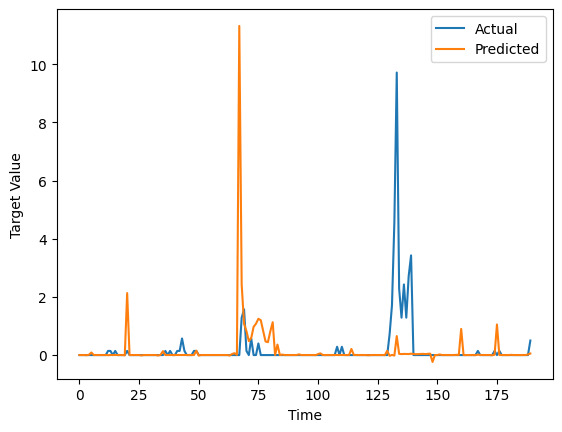

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'target_column' is the actual target column in the dataframe
plt.plot(y_test, label='Actual')
plt.plot(model.predict(x_test), label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.show()


In [ ]:
# prompt: give this a title and a summary

# Time Series Forecasting with LSTM, GRU, and SimpleRNN

This notebook demonstrates a time series forecasting model using a combination of LSTM, GRU, and SimpleRNN layers.  The model is trained on a dataset (likely containing time-stamped data and a target variable) to predict future values.  The dataset is preprocessed to handle missing values and transform categorical features (State) into numerical representations. Data is split into training and testing sets before being reshaped to suit the LSTM architecture. The model architecture includes LSTM, Dropout, BatchNormalization, GRU, SimpleRNN layers and a Dense output layer. Finally, the model is evaluated against the test set, and predictions are visualized alongside actual values for comparison.
